In [1]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [2]:
data = pd.read_csv("train.zip")
print("data.shape = {} rows, {} cols".format(*data.shape))
data.head(n=2)

data.shape = 60000 rows, 202 cols


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [3]:
x_train, x_valid = train_test_split(
    data.drop(["ID_code", "target"], axis=1), train_size=0.75, shuffle=True, random_state=1,
)
y_train, y_valid = train_test_split(
    data["target"], train_size=0.75, shuffle=True, random_state=1,
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 45000 rows, 200 cols
x_valid.shape = 15000 rows, 200 cols


## Решающие деревья

__Парамтеры дерева:__
* `criterion` - критерий информативности: для задачи классификации Джини / Энтроия, для задачи регрессии - дисперсия;
* `max_depth` - максимальная глубина дерева, по умолчанию, не ограничена;
* `min_samples_split` - минимальное количество объектов для проведения разбиения, по умолчанию, 2;
* `min_samples_leaf` - минимальное количество объектов для формирования листа, по умолчанию, 1;
* `max_features` - максимальное количество признаков для использования в дереве;
* `random_state` - состояние случайного счетчика, для воспроизводимости результатов;


In [4]:
model = DecisionTreeClassifier(random_state=27)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=27)

In [5]:
# Оценим значение метрики качества на обучении и на тесте

train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)}")

Train-score: 1.0, Valid-score: 0.557


## Важность признаков, на основе решающего дерева

In [6]:
importance = pd.DataFrame({
    "features": x_train.columns,
    "importance": model.feature_importances_
})

importance = importance.sort_values(by="importance", ascending=False)
importance = importance.reset_index(drop=True)
importance.head(n=2)

,features,importance
0,var_12,0.012811
1,var_81,0.012361


## Разделяющая гиперплоскость решающего дерева

In [7]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

In [8]:
model = DecisionTreeClassifier(random_state=27)
model.fit(
    X=x_train[["var_12", "var_81"]].sample(5000),
    y=y_train.sample(5000)
)

DecisionTreeClassifier(random_state=27)

In [9]:
xx, yy = get_grid(x_train[["var_12", "var_81"]].sample(5000).values)
predicted = model.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'feature_2')

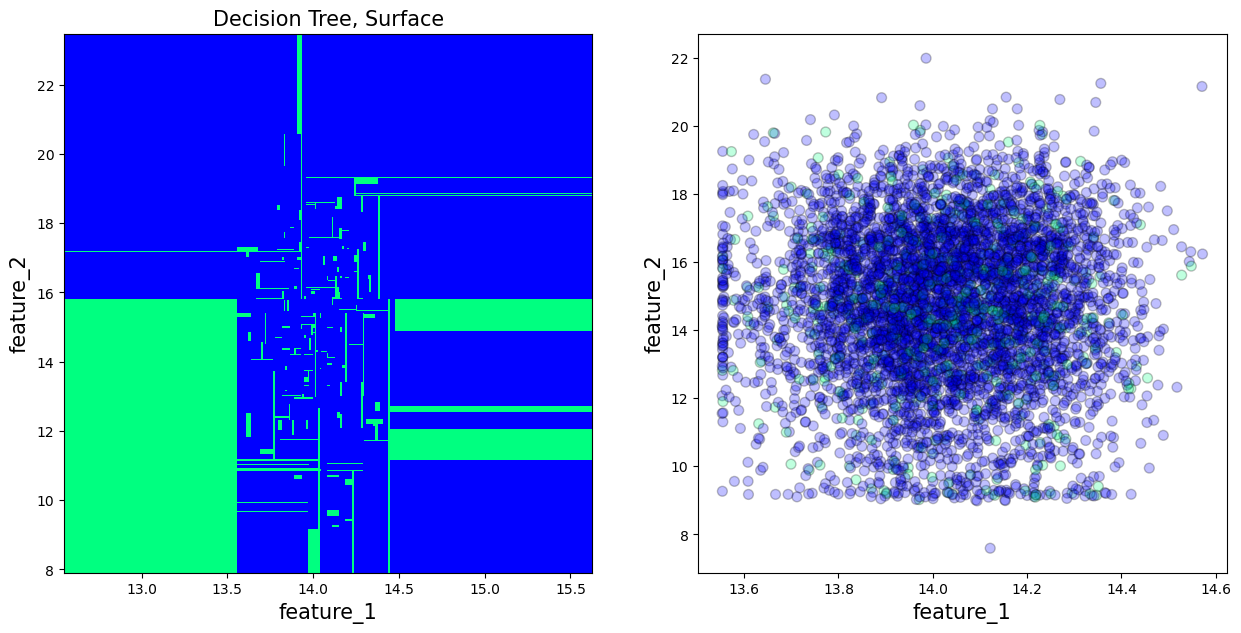

In [10]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.title("Decision Tree, Surface", size=15)
plt.pcolormesh(xx, yy, predicted, cmap='winter', linewidth=1.5)
plt.xlabel("feature_1", size=15)
plt.ylabel("feature_2", size=15)

plt.subplot(122)
plt.scatter(
    x_train["var_12"].sample(5000),
    x_train["var_81"].sample(5000),
    c=y_train.sample(5000),
    s=50, cmap='winter', edgecolor='k', alpha=0.25
)
plt.xlabel("feature_1", size=15)
plt.ylabel("feature_2", size=15)

## Гиперпараметры решающего дерева

/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/User

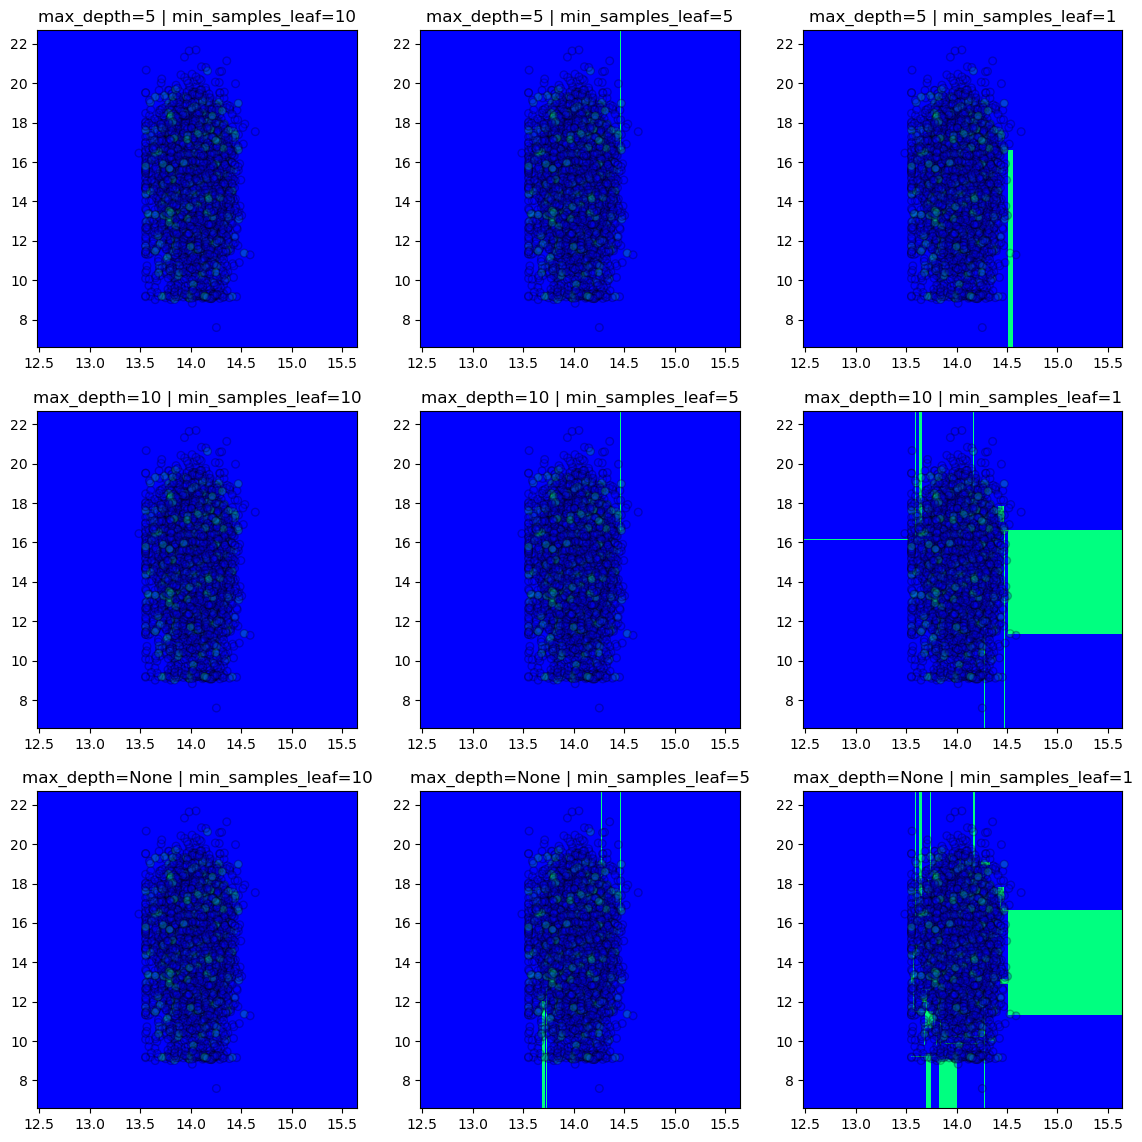

In [11]:
plt.figure(figsize=(14, 14))
data_y = y_train.sample(5000)
data_x = x_train[["var_12", "var_81"]].sample(5000)

for i, max_depth in enumerate([5, 10, None]):
    for j, min_samples_leaf in enumerate([10, 5, 1]):

        clf = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=27
        )
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x.values)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='winter')
        plt.scatter(
            data_x.values[:, 0],
            data_x.values[:, 1],
            c=data_y, s=30, 
            cmap='winter', 
            edgecolor='k',
            alpha=0.25
        )
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

## Неустойчивость решающих деревьев

/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/Arteria/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


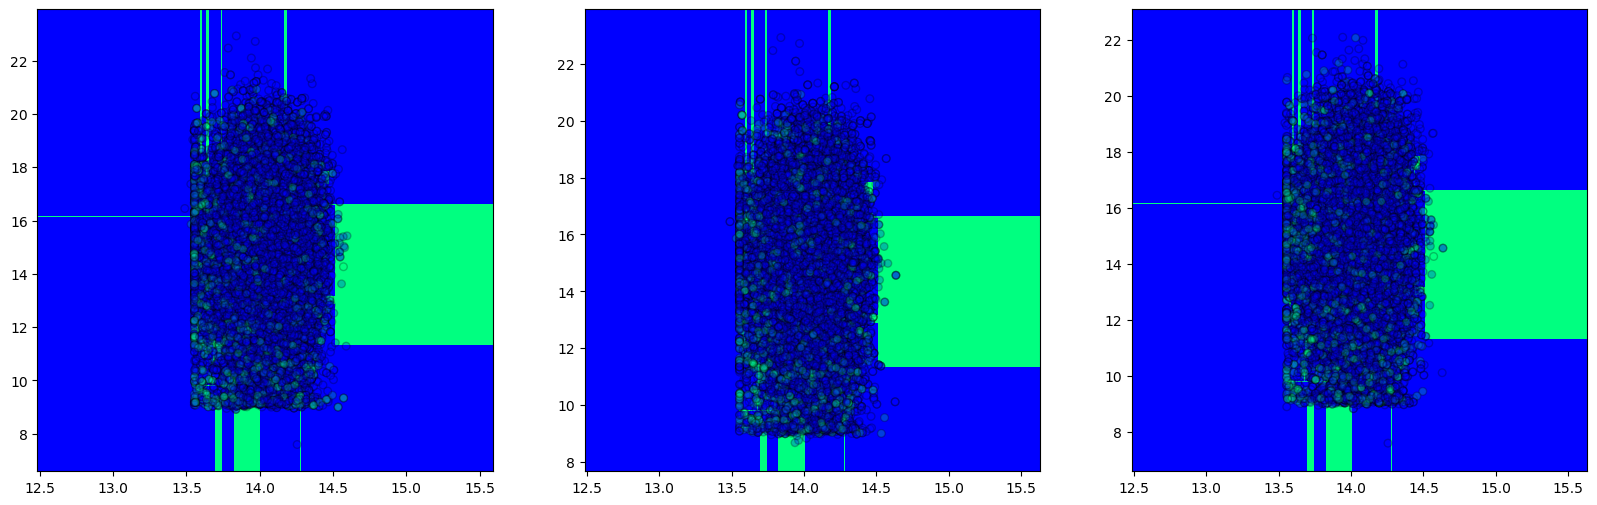

In [12]:
plt.figure(figsize=(20, 6))
data_x = x_train[["var_12", "var_81"]].values

for i in range(3):
    indecies = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.7))
    current_x, current_y = data_x[indecies], y_train.values[indecies]

    model = DecisionTreeClassifier()
    model.fit(current_x, current_y)
    xx, yy = get_grid(current_x)

    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted = predicted.reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(
        current_x[:, 0],
        current_x[:, 1],
        c=current_y, s=30,
        cmap='winter',
        edgecolor='k',
        alpha=0.25
    )

## Настройка гиперпараметров дерева и валидационные кривые

In [13]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (8, 8)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

## Глубина дерева - max_depth

In [14]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=27),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8],
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=3,
)

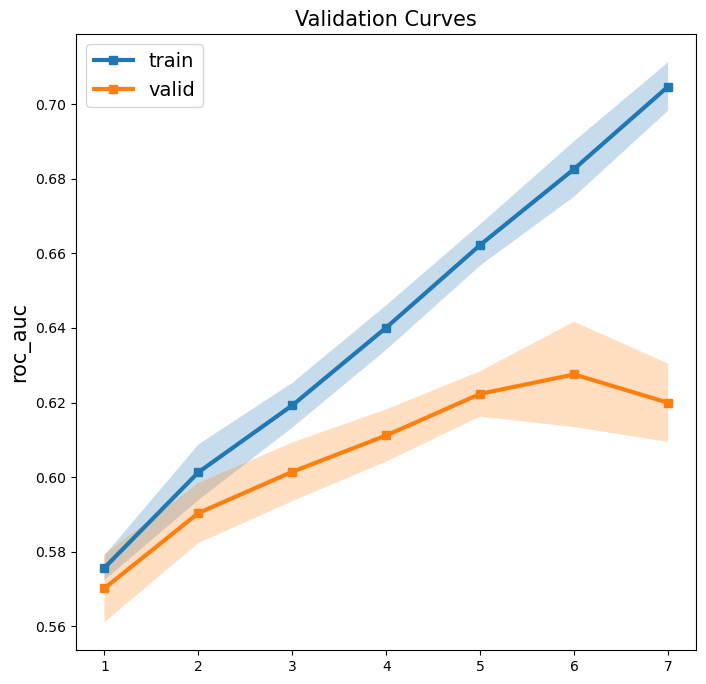

In [15]:
plot_validation_curves(
    train_scores, valid_scores
)

## Число объектов в листе - min_samples_leaf

In [16]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=7, random_state=27),
    param_range=[1, 5, 10, 25, 50, 100, 250],
    param_name="min_samples_leaf",
    scoring="roc_auc",
    n_jobs=-1,
    cv=3,
)

Text(0.5, 0, 'min_samples_leaf')

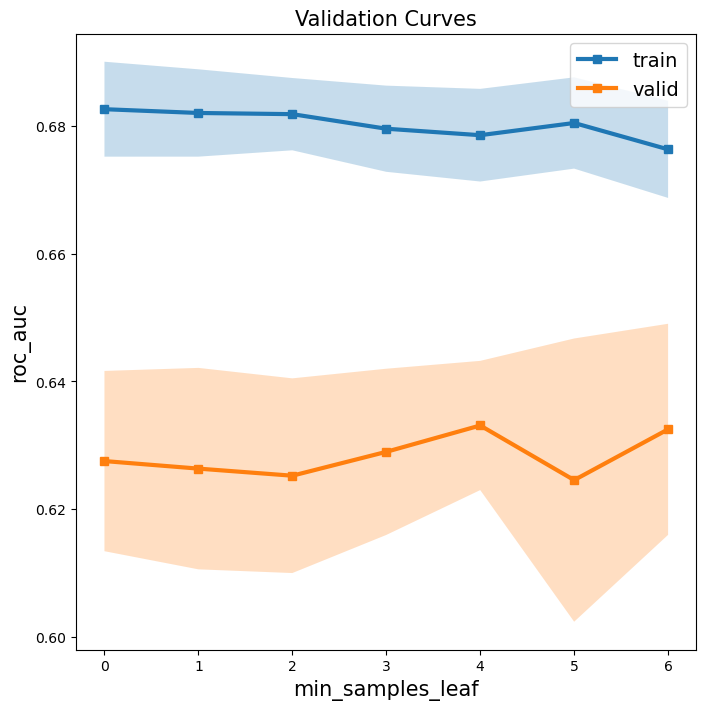

In [17]:
plot_validation_curves(
    train_scores, valid_scores
)
plt.xlabel("min_samples_leaf", size=15)

## Обучающие кривые


In [18]:
train_size, train_scores, valid_scores = learning_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=27),
    scoring="roc_auc",
    n_jobs=-1,
    cv=3
)

Text(0, 0.5, 'roc-auc')

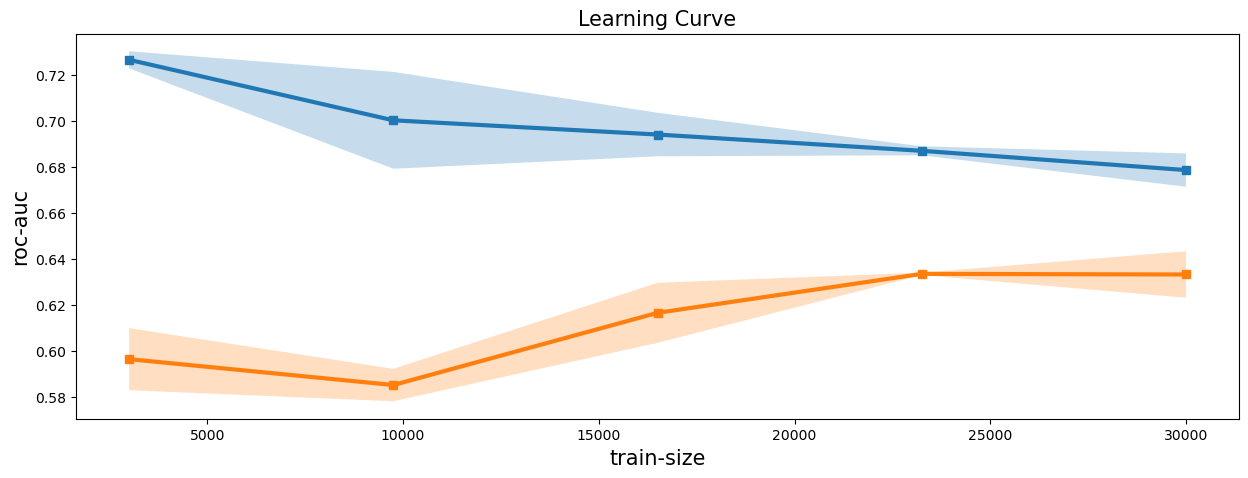

In [19]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_size, np.mean(train_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
    y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
    alpha=0.25
)
plt.plot(train_size, np.mean(valid_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
    y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
    alpha=0.25
)
plt.title("Learning Curve", size=15)
plt.xlabel("train-size", size=15)
plt.ylabel("roc-auc", size=15)